In [4]:
%matplotlib inline
import numpy as np
import numpy.ma as ma
import jinja2
import csv
import matplotlib.pyplot as plt

In [5]:
data_file = "./data/income_dist.csv"

In [6]:
def dataset(path):
    with open(path, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            yield row

In [7]:
print set([row["Country"] for row in dataset(data_file)])

set(['Canada', 'Italy', 'France', 'Netherlands', 'Ireland', 'Argentina', 'Norway', 'Australia', 'Singapore', 'China', 'Germany', 'Spain', 'Finland', 'Denmark', 'Tanzania', 'Indonesia', 'Mauritius', 'Sweden', 'Switzerland', 'New Zealand', 'United States', 'Portugal', 'South Africa', 'India', 'United Kingdom', 'Japan'])


In [9]:
print min(set(int(row["Year"]) for row in dataset(data_file)))
print max(set(int(row["Year"]) for row in dataset(data_file)))

1875
2010


In [10]:
filter(lambda row: row["Country"] == "United States", dataset(data_file))

[{'Average income per adult': '',
  'Average income per tax unit': '14601.78',
  'Average income per tax unit-adults': '',
  'Average income per tax unit-including capital gains': '14601.78',
  'Average income per tax unit-married couples & single adults': '',
  'Bottom 90% average income': '',
  'Bottom 90% average income-adults': '',
  'Bottom 90% average income-including capital gains': '',
  'Bottom 90% average income-tax units': '',
  'Country': 'United States',
  'Income control': '27630.88946',
  'Income control-including capital gains': '27630.88946',
  'Inverted Pareto-Lorenz coefficient': '3.135',
  'Number of adults': '',
  'Number of tax returns': '358',
  'Number of tax units': '37700.728',
  'Number of tax units-adults': '',
  'Number of tax units-married couples & single adults': '',
  'P90 income threshold': '',
  'P90 income threshold-including capital gains': '',
  'P95 income threshold': '',
  'P95 income threshold-including capital gains': '',
  'P99 income threshol

In [6]:
def dataset(path, filter_field=None, filter_value=None):
    with open(path, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        if filter_field:
            for row in filter(lambda row: row[filter_field]==filter_value, reader):
                yield row
        else:
            for row in reader:
                yield row

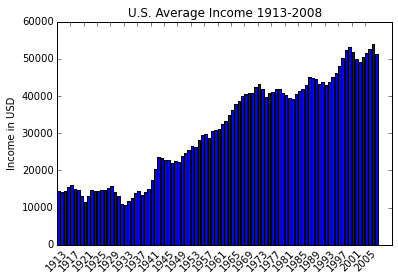

In [17]:
def dataset(path, filter_field=None, filter_value=None):
    with open(path, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        if filter_field:
            for row in filter(lambda row: row[filter_field]==filter_value, reader):
                yield row
        else:
            for row in reader:
                yield row
                
def main(path):
    data = [(row["Year"], float(row["Average income per tax unit"]))
           for row in dataset(path, "Country", "United States")]
    width = 0.35
    ind = np.arange(len(data))
    fig = plt.figure()
    ax = plt.subplot(111)
    ax.bar(ind, list(d[1] for d in data))
    ax.set_xticks(np.arange(0,len(data),4))
    ax.set_xticklabels(list(d[0] for d in data)[0::4], rotation = 45)
    ax.set_ylabel("Income in USD")
    plt.title("U.S. Average Income 1913-2008")
    
    plt.show()
    
if __name__ == "__main__":
    main(data_file)

    

In [28]:
names = ["country", "year"]
names.extend(["col%i" % (idx+1) for idx in xrange(352)])
dtype = "S64, i4," + ",".join(["f18" for idx in xrange(352)])

dataset = np.genfromtxt(data_file, dtype=dtype, names=names, delimiter=",", skip_header=1, autostrip=2)

In [31]:
ma.masked_invalid(dataset['col1'])
masked_array(data = [-- -- -- ..., 
                     45.26 45.51 45.6], mask = [True True True ..., 
                                                False False False], fill_value = 1e+20)

SyntaxError: invalid syntax (<ipython-input-31-bb8e408b9292>, line 2)

In [1]:
def dataset(path, country="United States"):
    """
    Extract the data for the country provided. Default is United
    States.
    """
    with open(path, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in filter(lambda row: row["Country"]==country,
                         reader):
            yield row

def timeseries(data, column):
    """Creates a year-based time series for the given column."""
    for row in filter(lambda row: row[column], data):
        yield (int(row["Year"]), row[column])

In [76]:
def linechart(series, **kwargs):
    fig = plt.figure()
    ax = plt.subplot(111)

    
    for line in series:
        line = list(line)
        xvals = [v[0] for v in line]
        yvals = [v[1] for v in line]
        ax.plot(xvals, yvals)
        
    if 'ylabel' in kwargs:
        ax.set_ylabel(kwargs['ylabel'])
        
    if 'title' in kwargs:
        plt.title(kwargs['title'])
        
    if 'labels' in kwargs:
        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
        ax.legend(kwargs.get('labels'), loc='center left',
                  bbox_to_anchor=(1, 0.5))
        
    return fig

In [9]:
def percent_income_share(source, country="United States"):
    """Create Income Share chart."""
    
    columns = (
            "Top 10% income share",
            "Top 5% income share",
            "Top 1% income share",
            "Top 0.5% income share",
            "Top 0.1% income share"
            )
    source = list(dataset(source, country))
    
    return linechart([timeseries(source, col) for col in
                         columns],
                    labels = columns,
                    title = country + " Percentage Income Share",
                    ylabel = "Percentage")

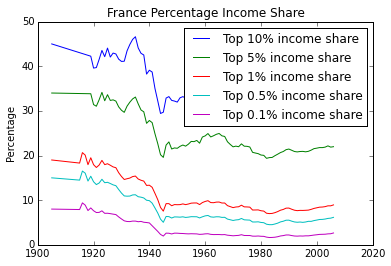

In [22]:
percent_income_share(data_file, "France")
plt.show()

In [25]:
def normalize(data):
    """Normalizes the data set. Excepts a timeseries input."""
    data = list(data)
    norm = np.array(list(d[1] for d in data), dtype = "f8")
    mean = norm.mean()
    norm /= mean
    return zip((d[0] for d in data), norm)

In [27]:
def mean_normalized_percent_income_share(source, country="United States"):
    columns = (
        "Top 10% income share",
        "Top 5% income share",
        "Top 1% income share",
        "Top 0.5% income share",
        "Top 0.1% income share"
    )
    source = list(dataset(source, country))
    
    return linechart([normalize(timeseries(source, col)) for
                         col in columns],
                    labels = columns,
                    title = "Mean Normalized " + country + " Percentage Income Share",
                    ylabel = "Percentage")

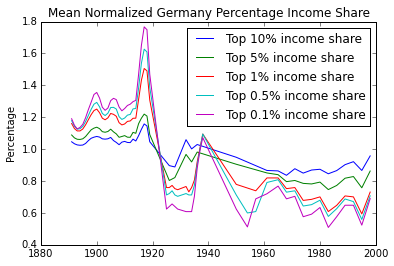

In [30]:
mean_normalized_percent_income_share(data_file, "Germany")
plt.show()

In [31]:
def delta(first, second):
    """Returns an array of deltas for the two arrays."""
    first = list(first)
    years = yrange(first)
    first = np.array(list(d[1] for d in first), dtype = "f8")
    second = np.array(list(d[1] for d in second), dtype = "f8")
    
    # Not for use in writing
    if first.size != second.size:
        first = np.insert(first, [0,0,0,0], [None, None, None, None])
        
    diff = first - second
    return zip(years, diff)

In [32]:
def yrange(data):
    """Get the range of years from the dataset."""
    years = set()
    for row in data:
        if row[0] not in years:
            yield row[0]
            years.add(row[0])

In [71]:
def capital_gains_lift(source, country="United States"):
    """Compute capital gains lift in top income percentages over time chart."""
    columns = (
        ("Top 10% income share-including capital gains","Top " +
         "10% income share"),
        ("Top 5% income share-including capital gains","Top " +
         "5% income share"),
        ("Top 1% income share-including capital gains","Top " +
         "1% income share"),
        ("Top 0.5% income share-including capital gains","Top " +
         "0.5% income share"),
        ("Top 0.1% income share-including capital gains","Top " +
         "0.1% income share"),
        ("Top 0.05% income share-including capital gains","Top " +
         "0.05% income share")
    )
    
    source = list(dataset(source, country))
    series = [delta(timeseries(source, a), timeseries(source, b)) for a, b in columns]
    
    return linechart(series, labels=list(col[1] for col in 
                                         columns),
                    title = country + " Capital Gains Income Lift",
                    ylabel = "Percentage Difference",
                    bbox_to_anchor = (1.1,1.05),
                    loc = "upper center")

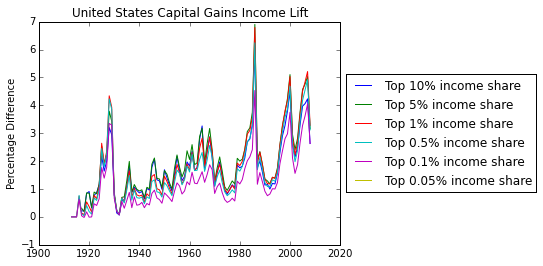

In [77]:
capital_gains_lift(data_filez)

plt.show()

In [41]:
columns = (
    ("Top 10% income share-including capital gains","Top " +
     "10% income share"),
    ("Top 5% income share-including capital gains","Top " +
     "5% income share"),
    ("Top 1% income share-including capital gains","Top " +
     "1% income share"),
    ("Top 0.5% income share-including capital gains","Top " +
     "0.5% income share"),
    ("Top 0.1% income share-including capital gains","Top " +
     "0.1% income share"),
    ("Top 0.05% income share-including capital gains","Top " +
     "0.05% income share")
)
columns

(('Top 10% income share-including capital gains', 'Top 10% income share'),
 ('Top 5% income share-including capital gains', 'Top 5% income share'),
 ('Top 1% income share-including capital gains', 'Top 1% income share'),
 ('Top 0.5% income share-including capital gains', 'Top 0.5% income share'),
 ('Top 0.1% income share-including capital gains', 'Top 0.1% income share'),
 ('Top 0.05% income share-including capital gains', 'Top 0.05% income share'))

In [80]:
def average_income(source, country="United States"):
    """Create Average Income chart."""
    
    columns = (
            "Top 10% average income",
            "Top 5% average income",
            "Top 1% average income",
            "Top 0.5% average income",
            "Top 0.1% average income"
            )
    source = list(dataset(source, country))
    
    return linechart([timeseries(source, col) for col in
                         columns],
                    labels = columns,
                    title = country + " Average Income",
                    ylabel = "2008 US Dollars")

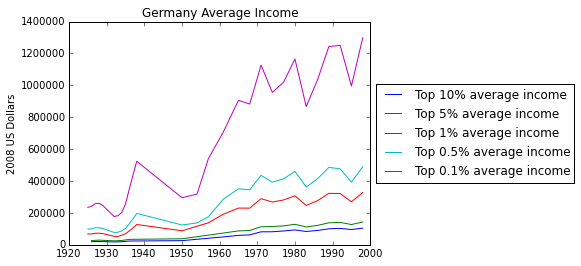

In [83]:
average_income(data_file, "Germany")
plt.show()

In [84]:
def average_top_income_lift(source, country="United States"):
    """Compares top percentage income avg over total avg."""
    columns = (
        ("Top 10% average income","Top " +
         "0.1% average income"),
        ("Top 5% average income","Top " +
         "0.1% average income"),
        ("Top 1% average income","Top " +
         "0.1% average income"),
        ("Top 0.5% average income","Top " +
         "0.1% average income"),
        ("Top 0.1% average income","Top " +
         "0.1% average income"),
        ("Top 0.05% average income","Top " +
         "0.1% average income")
    )
    
    source = list(dataset(source, country))
    series = [delta(timeseries(source, a), timeseries(source, b)) for a, b in columns]
    
    return linechart(series, labels=list(col[1] for col in 
                                         columns),
                    title = country + " Income Disparity",
                    ylabel = "2008 U.S. Dollars",
                    bbox_to_anchor = (1.1,1.05),
                    loc = "upper center")

In [85]:
average_top_income_lift(data_file)
plt.show()

ValueError: operands could not be broadcast together with shapes (4,) (96,) 

In [105]:
def stackedarea(series, **kwargs):
    fig = plt.figure()
    axe = fig.add_subplot(111)
    
    fnx = lambda s: np.array(list(v[1] for v in s), dtype="f8")
    yax = np.row_stack(fnx(s) for s in series)
    xax = np.arange(1917, 2008)

    polys = axe.stackplot(xax, yax)
    axe.margins(0,0)
    
    if 'ylabel' in kwargs:
        axe.set_ylabel(kwargs['ylabel'])
        
    if 'labels' in kwargs:
        legendProxies = []
        for poly in polys:
            legendProxies.append(plt.Rectangle((0,0), 1, 1,
                                              fc=poly.get_facecolor()[0]))
        box = axe.get_position()
        axe.set_position([box.x0, box.y0, box.width * 0.9, box.height])
        
        axe.legend(legendProxies, kwargs.get('labels'), loc='center left',
                  bbox_to_anchor=(1, 0.5))
        
    if 'title' in kwargs:
        plt.title(kwargs['title'])
        
    return fig

In [106]:
def income_composition(source, country="United States"):
    """Compares income composition."""
    
    columns = (
        "Top 10% income composition-Wages, salaries and pensions",
        "Top 10% income composition-Dividends",
        "Top 10% income composition-Interest Income",
        "Top 10% income composition-Rents",
        "Top 10% income composition-Entrepreneurial income",
    )
    
    source = list(dataset(source))
    labels = ("Salary", "Dividends", "Interest", "Rent", "Business")
    
    return stackedarea([timeseries(source, col) for col in columns],
                      labels=labels,
                      title="U.S. Top 10% Income Composition",
                      ylabel="Percentage")

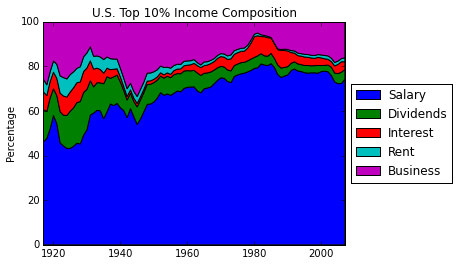

In [107]:
income_composition(data_file)
plt.show()

In [108]:
from jinja2 import Template